# Intro: Load in and Familiarize Data

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] =(15,5)

In [32]:
def identify_blanks(df):
    t = len(df)
    for each in df.columns:
        i = len(df.loc[df[each].isnull()])
        pct = int((i/t)*100)
        print(f'Column {each} has {i} missing values out of {t}.  {pct}%')
        
# define module to create frequency distribution of variables
def freq_dist(df, col):
    df_fd = pd.DataFrame(data=df[col].value_counts())
    df_fd['pct_total'] = df_fd[col] / df_fd[col].sum()
    print(df_fd.head(15))

    
#Creates Histogram for Comparitive Purposes
def review_detail(df, col, num, col2, num2, sub, meas, type1, stack):    
    if type1 == 'all':
        df_last_month = df.loc[(df[col] != num) & (df[col2] == num2)]
        df_last_month = df_last_month.groupby(by=[col, col2, 'Survived']).agg({'Survived':meas})
        df_last_month.rename(columns = {'index':'index'}, inplace=True)
        df_last_month['pct_total'] = ((df_last_month['Survived'] / df_last_month['Survived'].sum())*100).astype(int)
        df_last_month = pd.DataFrame(df_last_month)
        df_last_month = df_last_month.T
        print(df_last_month)
        df_last_month.drop_duplicates(inplace=True)
        df_last_month = df_last_month.T
        df_last_month.drop(columns=['pct_total'], inplace=True)


        df_last_month.unstack().plot(kind='bar', use_index=True, rot=0, 
                                     subplots=sub, stacked=stack)       
    else:
        df_last_month = df.loc[(df[col] != num) & (df[col2] != num2)]
        df_last_month = df_last_month.groupby(by=[col, col2, 'Survived']).agg({'Survived':meas})
        df_last_month.rename(columns = {'index':'index'}, inplace=True)
        df_last_month['pct_total'] = ((df_last_month['Survived'] / df_last_month['Survived'].sum())*100).astype(int)
        df_last_month = pd.DataFrame(df_last_month)
        df_last_month = df_last_month.T
        print(df_last_month)
        df_last_month.drop_duplicates(inplace=True)
        df_last_month = df_last_month.T
        df_last_month.drop(columns=['pct_total'], inplace=True)


        df_last_month.unstack().plot(kind='bar', use_index=True, rot=0, 
                                     subplots=sub, stacked=stack) 

In [33]:
#Import the data:
test = pd.read_csv('../data/raw/test.csv')
train = pd.read_csv('../data/raw/train.csv')

test['Label'] = 'test'
test['Survived'] = ''
train['Label'] = 'train'

test = test[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Survived']]

train = train[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Survived']]

In [34]:
identify_blanks(test)

identify_blanks(train)

Column PassengerId has 0 missing values out of 418.  0%
Column Pclass has 0 missing values out of 418.  0%
Column Name has 0 missing values out of 418.  0%
Column Sex has 0 missing values out of 418.  0%
Column Age has 86 missing values out of 418.  20%
Column SibSp has 0 missing values out of 418.  0%
Column Parch has 0 missing values out of 418.  0%
Column Ticket has 0 missing values out of 418.  0%
Column Fare has 1 missing values out of 418.  0%
Column Cabin has 327 missing values out of 418.  78%
Column Embarked has 0 missing values out of 418.  0%
Column Label has 0 missing values out of 418.  0%
Column Survived has 0 missing values out of 418.  0%
Column PassengerId has 0 missing values out of 891.  0%
Column Pclass has 0 missing values out of 891.  0%
Column Name has 0 missing values out of 891.  0%
Column Sex has 0 missing values out of 891.  0%
Column Age has 177 missing values out of 891.  19%
Column SibSp has 0 missing values out of 891.  0%
Column Parch has 0 missing value

In [35]:
print(test.columns)

print(train.columns)

df = test.append(train)
df.reset_index(inplace=True)

df.shape

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Survived'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Label', 'Survived'],
      dtype='object')


(1309, 14)

In [36]:
# importing data sets from kernel 
df['Total'] = 0

rows = len(df)
columns = len(df.columns)
values = rows*columns
non_na = df.count().sum()
na = values-non_na
print('In Data Set:\n')
print('Number of rows:', rows)
print('Number of columns:', columns, '\n')
print('Do any columns contain nulls?', '\n', df.info(), '\n')


identify_blanks(df)

In Data Set:

Number of rows: 1309
Number of columns: 15 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
index          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Label          1309 non-null object
Survived       1309 non-null object
Total          1309 non-null int64
dtypes: float64(2), int64(6), object(7)
memory usage: 153.5+ KB
Do any columns contain nulls? 
 None 

Column index has 0 missing values out of 1309.  0%
Column PassengerId has 0 missing values out of 1309.  0%
Column Pclass has 0 missing values out of 1309.  0%
Column Name has 0 missing values out

In [37]:
print('Data types: \n', test.dtypes, '\n')
print('Unique values: \n', test.nunique())
print('Below is a list of columns that have missing values:')
#Highlight what columns have missing values
[col for col in test.columns if test[col].isnull().any()]

Data types: 
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Label           object
Survived        object
dtype: object 

Unique values: 
 PassengerId    418
Pclass           3
Name           418
Sex              2
Age             79
SibSp            7
Parch            8
Ticket         363
Fare           169
Cabin           76
Embarked         3
Label            1
Survived         1
dtype: int64
Below is a list of columns that have missing values:


['Age', 'Fare', 'Cabin']

In [38]:
# Separate data into categorical and numerical 
df.select_dtypes('object').head(2)

,Name,Sex,Ticket,Cabin,Embarked,Label,Survived
0,"Kelly, Mr. James",male,330911,NaN,Q,test,
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,NaN,S,test,


In [39]:
# check the caragorical variable 
df.select_dtypes('float').head(2)

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000


# Begin to Clean and Analyze Data

## Delimit out the 'Name' column to become more relevant
### Before (below)

In [40]:
df['Name'][0]

'Kelly, Mr. James'

### After (below)

Prefix = Mr

First_Name = Kelly

Last_Name = James

In [41]:
df_name1 = df.Name.str.split(',', expand=True).add_prefix('Name_')
df1 = df.join(df_name1)
df1.rename(columns={'Name_0':'Last_Name', 'Name':'Full_Name', 
                    'Name_1':'Name'}, inplace=True)

df_name2 = df1.Name.str.split('.', expand=True).add_prefix('Name_')
df2 = df1.join(df_name2)

df2.rename(columns={'Name_0':'Prefix', 'Name_1':'Name_Fix'}, inplace=True)
df2.drop(columns=['Name_2'], inplace=True)

df_name3 = df2.Name_Fix.str.split(' ', expand=True).add_prefix('Name_')
df3 = df2.join(df_name3)

df3.rename(columns={'Name_1':'First_Name'}, inplace=True)
df3.drop(columns=['Name_0',
                 'Name_2',
                 'Name_3',
                 'Name_4',
                 'Name_5',
                 'Name_6',
                 'Name_7',
                 'Name_8',
                 'Name_9',
                 'Name_10',
                 'Name_Fix',
                 'Name',
                 'First_Name',
                 'Last_Name',
                 'index',
                 'Full_Name',
                 'Ticket',
                 'Cabin',
                 'PassengerId'], inplace=True)
df3['Prefix'] = df3['Prefix'].str.strip()

In [42]:
test = df3.loc[df3['Label'] == 'train']

In [43]:
test.select_dtypes('object').head()

,Sex,Embarked,Label,Survived,Prefix
418,male,S,train,0,Mr
419,female,C,train,1,Mrs
420,female,S,train,1,Miss
421,female,S,train,1,Mrs
422,male,S,train,0,Mr


In [44]:
test.select_dtypes('number').head()

,Pclass,Age,SibSp,Parch,Fare,Total
418,3,22.0,1,0,7.2500,0
419,1,38.0,1,0,71.2833,0
420,3,26.0,0,0,7.9250,0
421,1,35.0,1,0,53.1000,0
422,3,35.0,0,0,8.0500,0


In [45]:
#drop missing ages (based off of research done on seperate notebook
print('Before: ')
identify_blanks(test)

test = test.loc[test['Age'].notnull()]

print('After: ')
identify_blanks(test)

Before: 
Column Pclass has 0 missing values out of 891.  0%
Column Sex has 0 missing values out of 891.  0%
Column Age has 177 missing values out of 891.  19%
Column SibSp has 0 missing values out of 891.  0%
Column Parch has 0 missing values out of 891.  0%
Column Fare has 0 missing values out of 891.  0%
Column Embarked has 2 missing values out of 891.  0%
Column Label has 0 missing values out of 891.  0%
Column Survived has 0 missing values out of 891.  0%
Column Total has 0 missing values out of 891.  0%
Column Prefix has 0 missing values out of 891.  0%
After: 
Column Pclass has 0 missing values out of 714.  0%
Column Sex has 0 missing values out of 714.  0%
Column Age has 0 missing values out of 714.  0%
Column SibSp has 0 missing values out of 714.  0%
Column Parch has 0 missing values out of 714.  0%
Column Fare has 0 missing values out of 714.  0%
Column Embarked has 2 missing values out of 714.  0%
Column Label has 0 missing values out of 714.  0%
Column Survived has 0 missin

Sex       female      male    
Total          0         0    
Survived       0    1    0   1
Survived      64  197  360  93
pct_total      8   27   50  13


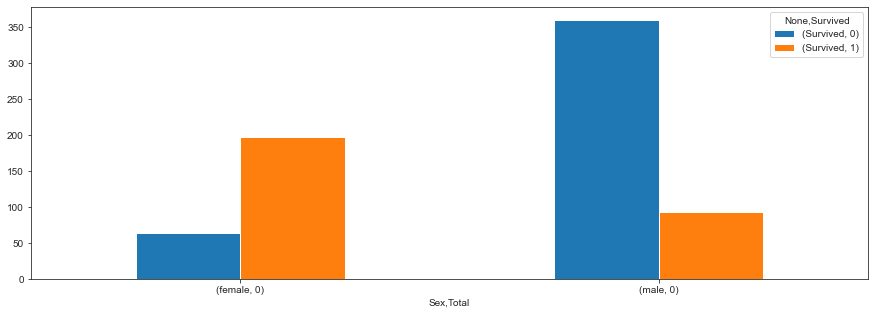

In [46]:
review_detail(test,
              'Sex', "", 
              'Total', '', 
              False,'count','not', False)

Based on the above, there is a clear inverse relationship between survivors sex....

Pclass         1                   2                   3             
Sex       female     male     female     male     female     male    
Survived       0   1    0   1      0   1    0   1      0   1    0   1
Survived       3  82   61  40      6  68   84  15     55  47  215  38
pct_total      0  11    8   5      0   9   11   2      7   6   30   5


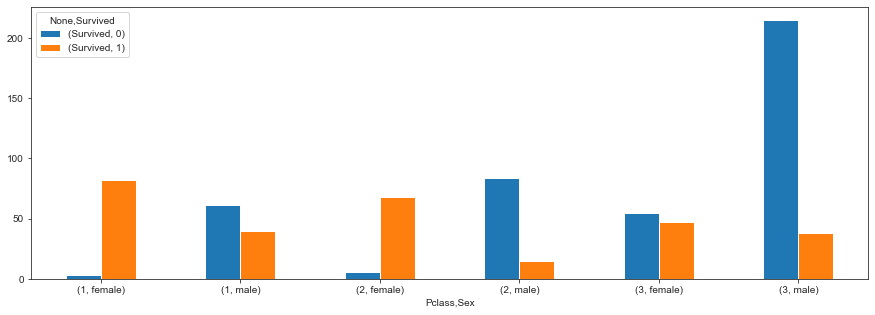

In [47]:
review_detail(test,
              'Pclass', "", 
              'Sex', '', 
              False,'count','not', False)

Based on the above, third class males are significanly disproportionate compared to the rest of the population.

In [48]:
def plot_distribution_num(test, test_select, legend) :
    sns.set_style('ticks')
    s = sns.FacetGrid(test, hue = legend, aspect = 2.5, palette = {1 : 'Lightblue', 0 : 'gold'})
    s.map(sns.kdeplot, test_select, shade = True, alpha = 0.8)
    s.set(xlim=(0, test[test_select].max()))
    s.add_legend()
    s.set_axis_labels(test_select, 'proportion')
    s.fig.suptitle(test_select)
    plt.show()

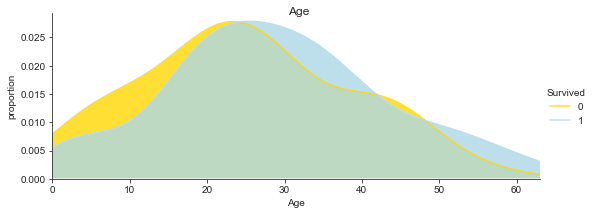

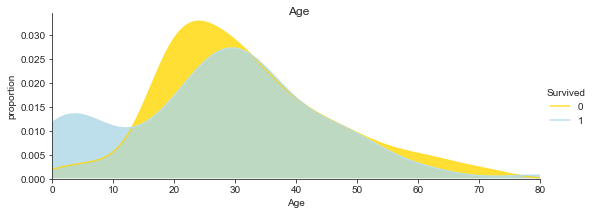

In [49]:
test_female = test.loc[test['Sex'] == 'female']
test_male = test.loc[test['Sex'] == 'male']

plot_distribution_num(test_female, 'Age', 'Survived')
plot_distribution_num(test_male, 'Age', 'Survived')

In [50]:
m_var = 17
f_var = 50

test.loc[(test['Age']<m_var) & (test['Sex'] == 'male') , 'Age_Bins'] = 'male_under_17'
test.loc[(test['Age']>m_var) & (test['Sex'] == 'male'), 'Age_Bins'] = 'male_over_17'
test.loc[(test['Age']<f_var) & (test['Sex'] == 'female'), 'Age_Bins'] = 'female_under_50'
test.loc[(test['Age']>f_var) & (test['Sex'] == 'female'), 'Age_Bins'] = 'female_over_50'

Age_Bins  male_over_17     male_under_17    
Sex               male              male    
Survived             0   1             0   1
Survived           325  70            29  22
pct_total           72  15             6   4


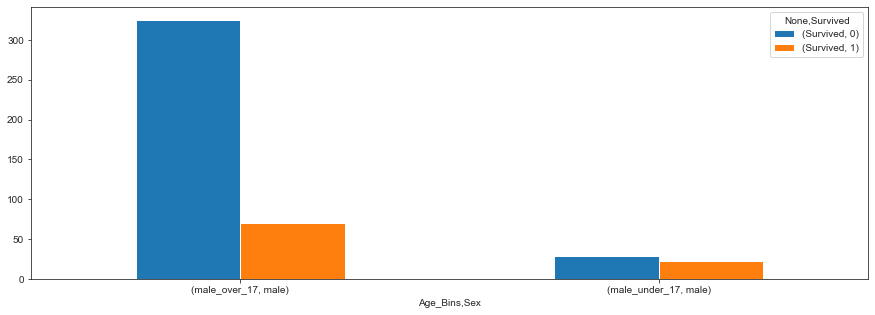

In [51]:
review_detail(test,
              'Age_Bins', "", 
              'Sex', 'female', 
              False,'count','not', False)

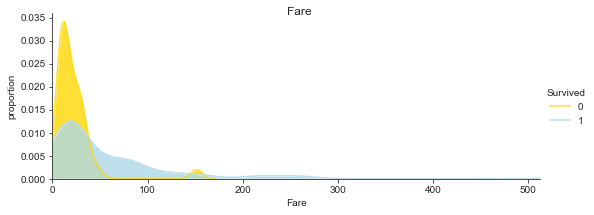

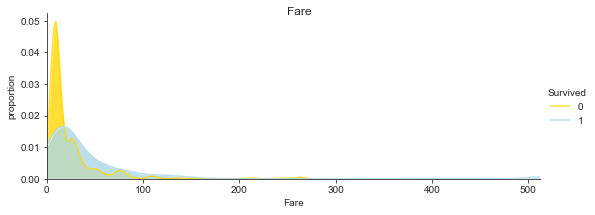

In [52]:
plot_distribution_num(test_female, 'Fare', 'Survived')
plot_distribution_num(test_male, 'Fare', 'Survived')

In [53]:
var = 50
test.loc[(test['Fare']<var), 'Fare_Bins'] = 'Less than $50'
test.loc[(test['Fare']>=var), 'Fare_Bins'] = 'Greater than or equal to $50'

In [54]:
test.select_dtypes('object').head(2)

,Sex,Embarked,Label,Survived,Prefix,Age_Bins,Fare_Bins
418,male,S,train,0,Mr,male_over_17,Less than $50
419,female,C,train,1,Mrs,female_under_50,Greater than or equal to $50


In [55]:
test.select_dtypes('number').head(2)

,Pclass,Age,SibSp,Parch,Fare,Total
418,3,22.0,1,0,7.2500,0
419,1,38.0,1,0,71.2833,0


Prefix    Capt Col    Don Dr    Jonkheer Lady Major     ... Mlle Mme   Mr      \
Total        0   0      0  0           0    0     0     ...    0   0    0       
Survived     0   0  1   0  0  1        0    1     0  1  ...    1   1    0   1   
Survived     1   1  1   1  3  3        1    1     1  1  ...    2   1  331  67   
pct_total    0   0  0   0  0  0        0    0     0  0  ...    0   0   46   9   

Prefix    Mrs     Ms Rev Sir the Countess  
Total       0      0   0   0            0  
Survived    0   1  1   0   1            1  
Survived   23  85  1   6   1            1  
pct_total   3  11  0   0   0            0  

[2 rows x 24 columns]


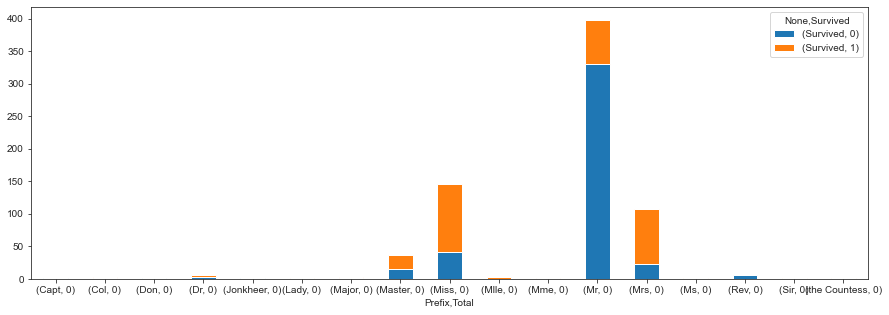

In [56]:
review_detail(test,
              'Prefix', "", 
              'Total', '', 
              False,'count','not', True)

Based on the above, the prefix is not very important to the survival rate

# Chapter 2: Begin Machine Learning

In [57]:
# group the categorical columns together
categorical = list(test.select_dtypes('object'))
numerical = list(test.select_dtypes('number'))

for ea in test.select_dtypes('object').columns:
    test[ea] = test[ea].astype('category').cat.codes

In [58]:
df = test

In [59]:
df.select_dtypes('number').head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Label,Survived,Total,Prefix,Age_Bins,Fare_Bins
418,3,1,22.0,1,0,7.2500,2,0,0,0,11,2,1
419,1,0,38.0,1,0,71.2833,0,0,1,0,12,1,0


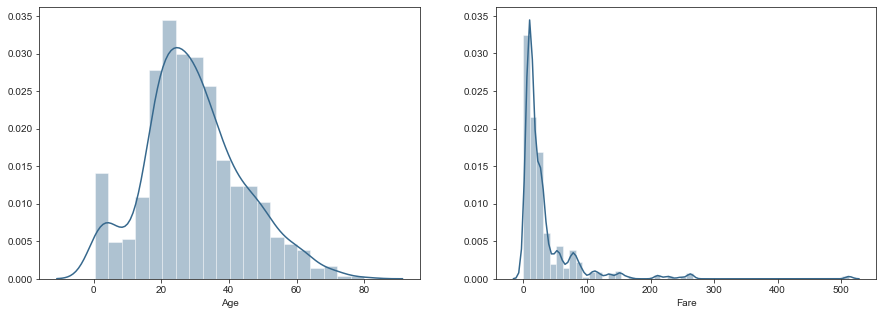

In [60]:
# Plot temp on y bar
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15, 5))
sns.distplot(df['Age'], ax=ax1, color='#36688D')
sns.distplot(df['Fare'], ax=ax2, color='#36688D')

In [61]:
Age = round(df['Age'].skew(),5)
print ('the skew of Age is', Age) 

Fare = round(df['Fare'].skew(),5)
print ('the skew of Fare is', Fare)

the skew of Age is 0.38911
the skew of Fare is 4.65363


Before (Left) 

the skew of Fare is 
 4.65363
After (Right)
the skew of Fare is 0.80339


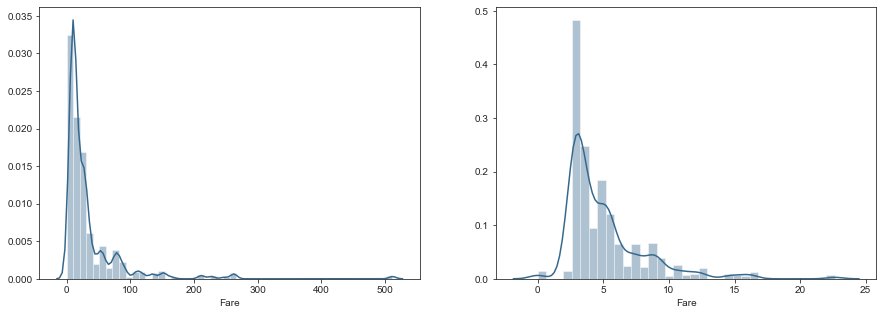

In [62]:
fig, (ax1, ax2) = plt.subplots(ncols=2,figsize=(15, 5))

print('Before (Left) \n')
sns.distplot(df['Fare'], ax=ax1, color='#36688D')
Fare = round(df['Fare'].skew(),5)

print ('the skew of Fare is', Fare, '\n')
df['Fare']= np.sqrt(df.Fare)

print('After (Right)')
sns.distplot(df['Fare'], ax=ax2, color='#36688D')
df['Fare']= np.sqrt(df.Fare)

Fare = round(df['Fare'].skew(),5)
print ('the skew of Fare is', Fare)